### EXERCISE 12.2-12.3

Many dataset on which are used neural networks possess symmetries and structures. To increase the efficiency has been invented a class of neural network that recognize these symmetries and takes advantage of the additional structure (locality and translational invariance): a Convolutional Neural Network.

In this exercise has been changed the architecture of the neural network to use convolutional layers. The network is formed with 3 convolutional layers separeted by 3 maxpooling layers with one filter $2x2$. Subsequently has been placed three fully connected layers of decreasing size 300 80 10.

In [130]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [131]:
from tensorflow.keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_valid, Y_valid) = mnist.load_data()

X_valid = X_valid.reshape(X_valid.shape[0], img_rows*img_cols)
#predictions = model_DNN.predict(X_valid)

X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols,1)



In [132]:
# you will need the following for Convolutional Neural Networks
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
print(X_train.shape)
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_valid = X_valid.reshape(X_valid.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_valid = keras.utils.to_categorical(Y_valid, num_classes)
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_valid.shape[0], 'test samples')

(60000, 28, 28)
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 5 filters (dimensionality of output space)
    model.add(Conv2D(7, kernel_size=(4, 4),
                     activation='relu',
                     input_shape=input_shape))
    #first MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #second convolutional layer with 10 filters
    model.add(Conv2D(14, kernel_size=(3, 3),activation='relu'))
    model.add(Dropout(0.1))
    #second MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #third convolutional layer
    model.add(Conv2D(21, kernel_size=(2, 2),activation='relu'))
    #third MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(300, activation='relu'))
    model.add(Dense(80, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    #
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model

In [133]:
def create_CNN():
    # instantiate model
    model = Sequential()
    # add first convolutional layer with 5 filters (dimensionality of output space)
    model.add(Conv2D(6, kernel_size=(4, 4),
                     activation='relu',
                     input_shape=input_shape))
    #first MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #second convolutional layer with 10 filters
    model.add(Conv2D(12, kernel_size=(3, 3),activation='relu'))
    model.add(Dropout(0.1))
    #second MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #third convolutional layer
    model.add(Conv2D(18, kernel_size=(2, 2),activation='relu'))
    #third MaxPooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(300, activation='relu'))
    model.add(Dense(80, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    #
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['accuracy'])
    return model

In [134]:
#reshape data, it could depend on Keras backend
X_valid = X_valid.reshape(X_valid.shape[0], img_rows*img_cols)
#predictions = model_DNN.predict(X_valid)

X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols,1)


# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

print(X_valid.shape)
print(X_train.shape)
print(Y_valid.shape)
print(Y_train.shape)
# train CNN
history = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_valid, Y_valid))

# evaliate model
score = model_CNN.evaluate(X_valid, Y_valid, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

(10000, 28, 28, 1)
(60000, 28, 28, 1)
(10000, 10)
(60000, 10)
Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.9814 - accuracy: 0.6868 - val_loss: 0.3824 - val_accuracy: 0.8792
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3606 - accuracy: 0.8845 - val_loss: 0.3120 - val_accuracy: 0.8996
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2750 - accuracy: 0.9120 - val_loss: 0.2403 - val_accuracy: 0.9247
Epoch 4/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2205 - accuracy: 0.9300 - val_loss: 0.1781 - val_accuracy: 0.9427
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.1415 - accuracy: 0.9542

Test loss: 0.14147686958312988
Test accuracy: 0.954200029373169


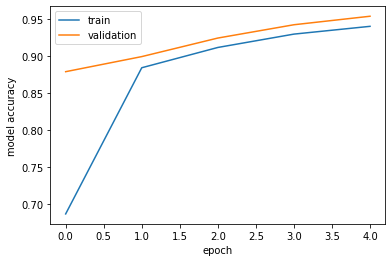

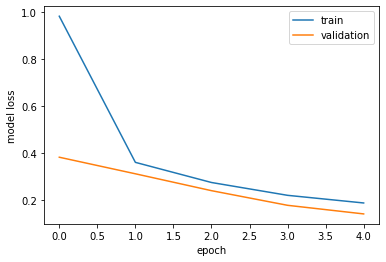

In [136]:
# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

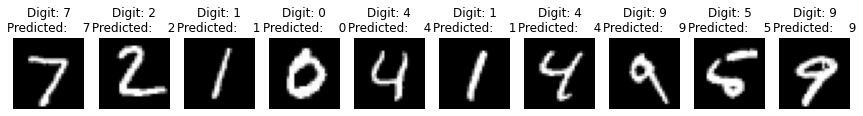

In [137]:
predictions = model_CNN.predict(X_valid)

plt.figure(figsize=(15, 15)) 
for i in range(10):
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_valid[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted:    {}".format(np.argmax(Y_valid[i]), np.argmax(predictions[i])))    
    plt.axis('off')
plt.show()

Image size: 28x28


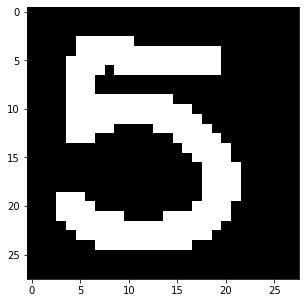

(28, 28)


In [149]:
from PIL import Image
import os

digit_filename = "5.png"
digit_in = Image.open(digit_filename).convert('L')

ydim, xdim = digit_in.size
print("Image size: "+str(xdim)+"x"+str(ydim))
pix=digit_in.load();
data = np.zeros((xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[i,j]=pix[j,i]

data /= 255

plt.figure(figsize=(5,5))
plt.imshow(data, cmap='gray')
plt.show()

print(data.shape)

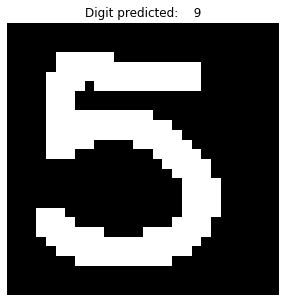

In [150]:
data = data.reshape(1, xdim, ydim, 1)
pred_0 = model_CNN.predict(data)

data = data.reshape(xdim,ydim)

plt.figure(figsize=(5, 5))  
plt.imshow(data, cmap='gray')    
plt.title("Digit predicted:    {}".format(np.argmax(pred_0)))
plt.axis('off') 
plt.show()

(4, 4, 1, 6)


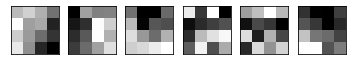

In [151]:
# layer_index should be the index of a convolutional layer
layer_index=0
# retrieve weights from the convolutional hidden layer
filters, biases = model_CNN.layers[layer_index].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print(filters.shape)

# plot filters
n_filters, ix = filters.shape[3], 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # specify subplot and turn of axis
    ax = plt.subplot(1,n_filters, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, 0], cmap='gray')
    ix += 1
# show the figure
plt.show()

In [152]:
valid_index = 0

from tensorflow.keras.models import Model
layer_outputs = [layer.output for layer in model_CNN.layers]
activation_model = Model(inputs=model_CNN.input, outputs=layer_outputs)
activations = activation_model.predict(X_valid[valid_index].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, layer_index): 
    activation = activations[layer_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3,col_size*3))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

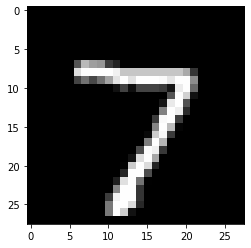

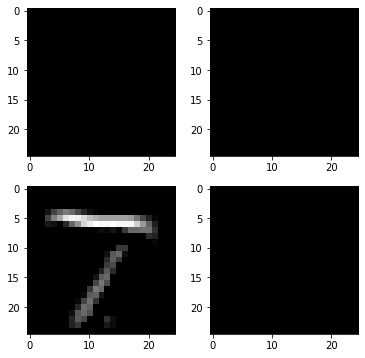

In [153]:
%matplotlib inline
plt.imshow(X_valid[valid_index][:,:,0], cmap='gray')
# def display_activation(activations, col_size, row_size, layer number)
display_activation(activations, 2, 2, 0)
# col_size x row_size must be <= Number of filters for the convolutional layer